# QP-2 : Quantum Teleportation

 - Name : **Jayant Som**
 
 - Contact : **jsom@buffalo.edu | 716-348-7708**

**_______________________________________________________________________________________________________________**

## 1. Quantum Circuit creation

#### i) Imports :

In [1]:
# Importing the QuantumCircuit class from Qiskit
# The QuantumCircuit class is used to create quantum circuits
from qiskit import QuantumCircuit

# Importing the plot_histogram function from qiskit 
# It used to visualize the simulation result.
from qiskit.visualization import plot_histogram

# Importing the numpy library
# Numpy is used for working with arrays and perform numerical operations
import numpy as np

#### ii) Quantum circuit creation and adding different components:

The secret state ***|Ψ> = cos(pi/5)|0> + i sin(pi/5)|1>***

- the probability of **|0>** is approx **65.5%**
- the probability of **|1>** is approx **34.5%**

In [2]:
# Creating a Quantum Circuit with 3 qubits and 1 classical bit
circuit = QuantumCircuit(3, 1)

# Preparing the state |Ψ> = cos(pi/5)|0> + i sin(pi/5)|1> on q0
circuit.ry(-2.0 * np.pi / 5.0, 0)

# Preparing Bell state |B00> on qubits q1 and q2
# H followed by CNOT produces entanglement
# Applying Hadamard gate to q1
circuit.h(1) 
# Applying CNOT gate with q1 as control and q2 as target
circuit.cx(1, 2)  

# 1st barrier : to separate state preparation from teleportation
circuit.barrier()

# Performing Teleportation step
# Applying CNOT gate with q0 as control and q1 as target
circuit.cx(0, 1)
# Applying Hadamard gate to q0
circuit.h(0)

# 2nd Barrier : to separate teleportation from corrections
circuit.barrier()

# Applying the corrections to q2 to render the final state
# Applying X gate if q1 is 1
circuit.cx(1, 2)
# Applying Z gate if q0 is 1
circuit.cz(0, 2)  

# 3rd barrier: to separate correction from final measurement
circuit.barrier()

# I am measuring q2 to verify the teleported state
# Measuring q2 and storing the result in classical bit 0
circuit.measure(2, 0)

#### iii) Circuit diagram :

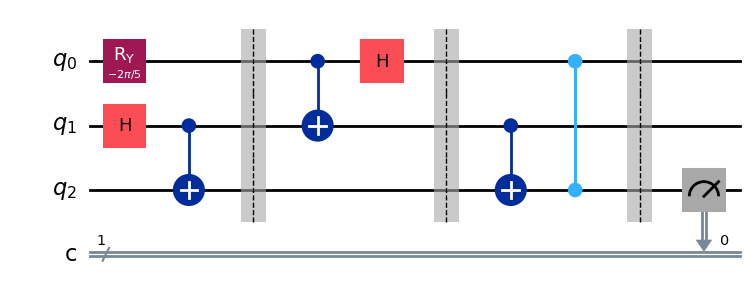

In [3]:
# The draw method is used to visualize the quantum circuit.
# I am drawing the circuit using the 'mpl' output and 'iqp' style
circuit.draw(output='mpl', style='iqp')

***Fig 01 : Quantum Circuit for the Single Photon Interferometer***

The above circuit diagram comprises of following notations and components :

**Circuit Notations :**

- **qo** is the 1st qubit represented by the solid horizontal line. (Alice's)
- **q1** is the 2nd qubit represented by the solid horizontal line. (Alice's)
- **q2** is the 3rd qubit represented by the solid horizontal line. (Bob's)
- **c** is the classical bit after measurement which is represented by the double lines.
- **1/** above the double lines represents the no. of classical data bits.

**Circuit Components (left to right according to time step) :**

- **Ry** in red box represents the rotation operator. It is used to apply rotation around the y-axis by -2π/5 rad. It is used for preparing the secret state |Ψ> = cos(pi/5)|0> + i sin(pi/5)|1> on q0.
- **H** in orange box represents the Hadamard gate on q1. It produces superposition.
- **CNOT** denoted by dark-blue line where **.** is the control(q1) and **+** is the target(q2).
  H followed by CNOT produces entanglement.
- **Barrier** denoted by dotted lines separates the initial state preparation from teleportation.
- **CNOT** denoted by dark-blue line where **.** is the control(q0) and **+** is the target(q1).
- **H** in orange box represents the Hadamard gate on q0.
  CNOT followed by H produces disentanglement.
- **Barrier** denoted by dotted lines separates to separate teleportation step from corrections.
- **CX** denoted by dark-blue line where **.** is the control(q1) and **+** is the target(q2).
- **CZ** denoted by sky-blue line where **.** is the control(q0) and **.** is the target(q2).
- **Meter** in gray box represents the Measurement operation.

## 2. Simulation code and output

#### i) Imports :

In [4]:
# The qiskit_aer library provides backend quantum simulators 
# I am importing the Aer module which contains various type of simulators.
from qiskit_aer import Aer

# I am importing the transpile function from the qiskit library
# Transpile function is required to ensure that my circuit 
# is able to run on the simulator.
from qiskit import transpile

#### ii) Getting the Simulator and running it

In [5]:
# The qasm simulator runs the circuit and its result is classical bits.
simulator = Aer.get_backend("qasm_simulator")

# Transpile transforms the circuit to something appropriate for the machine.
# I am transpiling my circuit for the backend qasm simulator
sim_circuit = transpile(circuit, backend = simulator)

# The run method in the simulator executes the transpiled circuit.
# I am running the trial 4096 times.
job_sim = simulator.run(sim_circuit, shots = 4096)

#### iii) Fetching the result and plotting histogram :

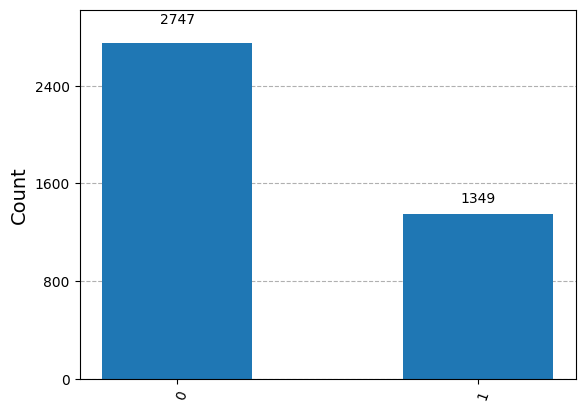

In [6]:
# I am fetching the results of the simulation job execution.
# This result contains the counts of each measurement outcome.
result_sim = job_sim.result()

# result.get_counts() method is used to find the count of different outcomes.
# I am generating and displaying a histogram of the simulation outcomes.
plot_histogram(result_sim.get_counts(circuit))

***Fig 02 : Measured state Vs Counts***

The histogram represents the probability of measuring the output states when my quantum circuit runs on the simulator.

In the above histogram :
- The **x-axis** represents the measured states.
- The **y-axis** represents the number of times each state was measured.

I ran my circuit for 4096 trials. 

Here, on the x-axis, there is 0 with count 2720 and 1 with count 1376, which means that the measurement found the qubit q2 in :
- |0⟩ state 2747 times out of 4096 trials, so probability of |0⟩ state is 2747/4096 = **67.0%**
- |1⟩ state 1349 times out of 4096 trials, so probability of |1⟩ state is 1349/4096 = **33.0%**

These probability values of finding q2 in |0⟩ and |1⟩ is approx very close to that in intial state |Ψ>, |0> 65.5% and |1> 34.5%. This proves that the teleportation was successful.

## 3. IBM QC Hardware calculation

#### i) Imports :

In [7]:
# Importing the QiskitRuntimeService class from qiskit_ibm_runtime module
# The QiskitRuntimeService class is used to connect to IBMQ Services 
# and run actual IBM QC hardware
from qiskit_ibm_runtime import QiskitRuntimeService

# Importing the SamplerV2 class from qiskit_ibm_runtime module
# The SamplerV2 class is used to find the probabilities of output states
from qiskit_ibm_runtime import SamplerV2 as Sampler

#### ii) Getting the Hardware and running it

In [8]:
# I am creating a new object of QiskitRuntimeService
# It is used to connect with my IBMQ account and use the sevices
service = QiskitRuntimeService()


# backends method is used to fetch list of all available quantum backends
mybackends = service.backends(operational = True, simulator = False, 
                              min_num_qubits = 5)
mybackends

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_sherbrooke')>,
 <IBMBackend('ibm_kyiv')>]

In [9]:
# least_busy method is used to pick the best available backend
device = service.least_busy(operational = True, simulator = False, 
                            min_num_qubits = 5) 
device

<IBMBackend('ibm_kyiv')>

In [10]:
# Transpile transforms the circuit to something appropriate for the hardware
# seed is used to get the same transpiled circuit every time I run
transpiled_circuit = transpile(circuit, device, seed_transpiler = 13)

# SamplerV2 is used to find the probabilities of output states
# mode = device is used to select the least busy hardware I got above
sampler = Sampler(mode = device)

# The run method in the sampler executes the transpiled circuit
job_hardware = sampler.run([transpiled_circuit]) 

#### iii) Fetching the result and plotting histogram :

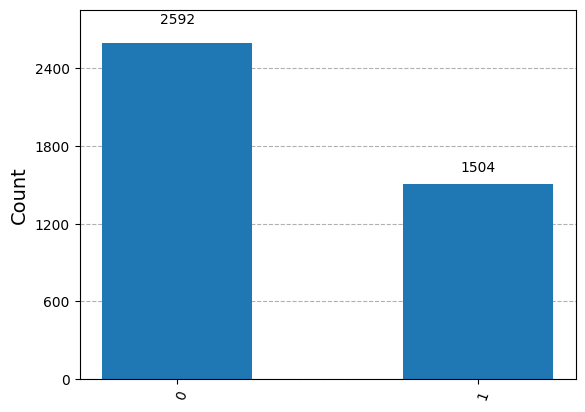

In [11]:
# I am fetching the results of the sampler job execution.
# This result contains the counts of each measurement outcome.
result_hardware = job_hardware.result()

# the 1st element at 0th index is the public result
pub_result = result_hardware[0]

# I am extracting the classical data part from the public result
# the values of c tells about the count of each outcome
classical_data = pub_result.data.c

# .get_counts() is used to measure the data in the classical bit 'c'
# I am generating and displaying a histogram of the execution outcomes
plot_histogram(classical_data.get_counts()) 

***Fig 03 : Measured state Vs Counts***

The histogram represents the probability of measuring the output states when my quantum circuit runs on the IBM QC Hardware.

In the above histogram :
- The **x-axis** represents the measured states.
- The **y-axis** represents the number of times each state was measured.

The circuit ran for 4096 trials on the IBM QC Hardware. 

Here, on the x-axis, there is 0 with count 2720 and 1 with count 1376, which means that the measurement found the qubit q2 in :
- |0⟩ state 2592 times out of 4096 trials, so probability of |0⟩ state is 2592/4096 = **63.3%**
- |1⟩ state 1504 times out of 4096 trials, so probability of |1⟩ state is 1504/4096 = **36.7%**

These probability values of finding q2 in |0⟩ and |1⟩ is approx very close to that in intial state |Ψ>, |0> 65.5% and |1> 34.5%. This proves that the teleportation was successful. 

Also the simulator and the IBM QC Hardware produced very similar results, which validates the teleportation.